<a href="https://colab.research.google.com/github/Lorraine254/PrinciplesOfDSA/blob/main/DSA8203_CAT_I_CEyinda_ID_148454.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**HONDURAS CLIMATE ANALYSIS**

In [1]:
#loading the required libraries
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Lorraine254/PrinciplesOfDSA/main/climate-change_hnd.csv')
data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Honduras,HND,2021,Agricultural land (sq. km),AG.LND.AGRI.K2,35760.0
1,Honduras,HND,2020,Agricultural land (sq. km),AG.LND.AGRI.K2,35380.0
2,Honduras,HND,2019,Agricultural land (sq. km),AG.LND.AGRI.K2,35090.0
3,Honduras,HND,2018,Agricultural land (sq. km),AG.LND.AGRI.K2,35090.0
4,Honduras,HND,2017,Agricultural land (sq. km),AG.LND.AGRI.K2,34880.0


### Data Understanding

In [3]:
#Number of rows and columns in the dataset
data.shape

(1943, 6)

## **Q7.What cleanup was required in your dataset? Determine how to handle the missing values for your dataset.**

The clean up that was done for this dataset include:
    

*   Dropping irrelevant rows
*   Creation of separate dataframes for each indicator in order to facilitate analysis.
*   Resetting of the index of the new data frames






### a)Checking for missing values

In [5]:
# Checking for the sum of missing values
data.isna().sum()

Country Name      0
Country ISO3      0
Year              0
Indicator Name    0
Indicator Code    0
Value             0
dtype: int64

- The dataset doesn't contain any missing values.

### b)Dropping Irrelevant Columns


In [6]:
# Dropping unnecessary columns
df=data.drop(['Country ISO3','Indicator Code'],axis=1)

In [7]:
#checking if the columns have been dropped.
df.columns

Index(['Country Name', 'Year', 'Indicator Name', 'Value'], dtype='object')

### c) Creating separate dataframes for each indicator

- In order to perform further analysis specific to respective indicators, l had to create separate dataframes for each indicator.

In [8]:
# Checking for the available indicators
df['Indicator Name'].unique()

array(['Agricultural land (sq. km)', 'Agricultural land (% of land area)',
       'Arable land (% of land area)',
       'Rural land area where elevation is below 5 meters (sq. km)',
       'Rural land area where elevation is below 5 meters (% of total land area)',
       'Urban land area where elevation is below 5 meters (sq. km)',
       'Urban land area where elevation is below 5 meters (% of total land area)',
       'Land area where elevation is below 5 meters (% of total land area)',
       'Forest area (sq. km)', 'Forest area (% of land area)',
       'Agricultural irrigated land (% of total agricultural land)',
       'Average precipitation in depth (mm per year)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of population)',
       'Renewable energy consumption (% of total final energy consumption)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'CO2 emissions from

In [9]:
#defining a function to create the dataframes
def get_indicator_dataframe(indicator_name):
    return df[df['Indicator Name'] == indicator_name]



In [10]:
# Applying the function to the dataset
agriculture_sq_km_df = get_indicator_dataframe('Agricultural land (sq. km)')
agriculture_percent_area_df = get_indicator_dataframe('Agricultural land (% of land area)')
arable_land_df=  get_indicator_dataframe('Arable land (% of land area)')
rural_sqkm_df=  get_indicator_dataframe( 'Rural land area where elevation is below 5 meters (sq. km)')
rural_percent_df=  get_indicator_dataframe('Rural land area where elevation is below 5 meters (% of total land area)')
urban_sqkm_df=  get_indicator_dataframe('Urban land area where elevation is below 5 meters (sq. km)')
urban_percent_df=  get_indicator_dataframe('Urban land area where elevation is below 5 meters (% of total land area)')
land_area_df=  get_indicator_dataframe('Land area where elevation is below 5 meters (% of total land area)')
forest_sqkm_df=  get_indicator_dataframe( 'Forest area (sq. km)')
forest_percent_df=  get_indicator_dataframe('Forest area (% of land area)')
agri_irrigated_df=  get_indicator_dataframe('Agricultural irrigated land (% of total agricultural land)')
avg_precp_df=  get_indicator_dataframe( 'Average precipitation in depth (mm per year)')
cereal_yield_df=  get_indicator_dataframe( 'Cereal yield (kg per hectare)')
foreign_inves_df=  get_indicator_dataframe('Foreign direct investment, net inflows (% of GDP)')
elec_access_df=  get_indicator_dataframe( 'Access to electricity (% of population)')
renewable_cons_df=  get_indicator_dataframe( 'Renewable energy consumption (% of total final energy consumption)')
co2_energy_df=  get_indicator_dataframe('CO2 intensity (kg per kg of oil equivalent energy use)')
co2_fuel_df=  get_indicator_dataframe( 'CO2 emissions from gaseous fuel consumption (kt)')
co2_fuel_percent=  get_indicator_dataframe('CO2 emissions from gaseous fuel consumption (% of total)')
co2_per_gdp=  get_indicator_dataframe( 'CO2 emissions (kg per 2015 US$ of GDP')
co2_kt=  get_indicator_dataframe( 'CO2 emissions (kt)')
co2_liquid_fuel_kt=  get_indicator_dataframe( 'CO2 emissions from liquid fuel consumption (kt)')
co2_liqued_fuel_percent=  get_indicator_dataframe('CO2 emissions from liquid fuel consumption (% of total)')
co2_metric_tonnes=  get_indicator_dataframe('CO2 emissions (metric tons per capita)')
cO2_kg_GDP=  get_indicator_dataframe('CO2 emissions (kg per PPP $ of GDP)')
co2_per_2017=  get_indicator_dataframe( 'CO2 emissions (kg per 2017 PPP $ of GDP)')
co2_solid_fuel_kt=  get_indicator_dataframe('CO2 emissions from solid fuel consumption (kt)')
co2_solid_fuel_percent=  get_indicator_dataframe('CO2 emissions from solid fuel consumption (% of total)')
other_ghg=  get_indicator_dataframe('Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)')
other_ghg_percent=  get_indicator_dataframe('Other greenhouse gas emissions (% change from 1990)')
total_ghg_co2e=  get_indicator_dataframe( 'Total greenhouse gas emissions (kt of CO2 equivalent)')
total_ghg_percent_change=  get_indicator_dataframe('Total greenhouse gas emissions (% change from 1990)')
hfc_emissions_tons=  get_indicator_dataframe('HFC gas emissions (thousand metric tons of CO2 equivalent)')
methane_emis_kt=  get_indicator_dataframe('Methane emissions (kt of CO2 equivalent)')
methane_emis_percent=  get_indicator_dataframe('Methane emissions (% change from 1990)')
no2_co2e=  get_indicator_dataframe('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')
no2_percent=  get_indicator_dataframe('Nitrous oxide emissions (% change from 1990)')
pfc_co2e=  get_indicator_dataframe('PFC gas emissions (thousand metric tons of CO2 equivalent)')
sf6_co2e=  get_indicator_dataframe( 'SF6 gas emissions (thousand metric tons of CO2 equivalent)')
disast_risk_reduction_progress=  get_indicator_dataframe('Disaster risk reduction progress score (1-5 scale; 5=best)')
lucf_removal=  get_indicator_dataframe('GHG net emissions/removals by LUCF (Mt of CO2 equivalent)')
floods_popln=  get_indicator_dataframe('Droughts, floods, extreme temperatures (% of population, average 1990-2009)')
rural_elev_below_5=  get_indicator_dataframe('Rural population living in areas where elevation is below 5 meters (% of total population)')
urban_elev_below_5=  get_indicator_dataframe('Urban population living in areas where elevation is below 5 meters (% of total population)')
popln_below_5=  get_indicator_dataframe('Population living in areas where elevation is below 5 meters (% of total population)')
popln_agglo_more_than_1M=  get_indicator_dataframe('Population in urban agglomerations of more than 1 million (% of total population)')
fresh_water_withdrawals=  get_indicator_dataframe( 'Annual freshwater withdrawals, total (billion cubic meters)')
fresh_water_withdrawals_percent=  get_indicator_dataframe('Annual freshwater withdrawals, total (% of internal resources)')
terrestial_protected_areas_percent=  get_indicator_dataframe('Terrestrial protected areas (% of total land area)')
marine_protected_areas_percent=  get_indicator_dataframe('Marine protected areas (% of territorial waters)')
terrestial_marine_protected_areas=  get_indicator_dataframe('Terrestrial and marine protected areas (% of total territorial area)')
ease_of_doing_business=  get_indicator_dataframe('Ease of doing business rank (1=most business-friendly regulations)')
public_sector_average=  get_indicator_dataframe( 'CPIA public sector management and institutions cluster average (1=low to 6=high)')
agriculture_value_added=  get_indicator_dataframe('Agriculture, forestry, and fishing, value added (% of GDP)')
school_enrollment=  get_indicator_dataframe('School enrollment, primary and secondary (gross), gender parity index (GPI)')
primary_completin_rate=  get_indicator_dataframe('Primary completion rate, total (% of relevant age group)')
mortality_rate=  get_indicator_dataframe('Mortality rate, under-5 (per 1,000 live births)')
prrevalence_underweight_percentage=  get_indicator_dataframe( 'Prevalence of underweight, weight for age (% of children under 5)')
poverty_headcount_percent=  get_indicator_dataframe('Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)')
popln_growth_percent=  get_indicator_dataframe('Population growth (annual %)')
total_population=  get_indicator_dataframe( 'Population, total')
urban_popln_growth=  get_indicator_dataframe('Urban population growth (annual %)')
urban_popln=  get_indicator_dataframe('Urban population')
urban_population_percentage=  get_indicator_dataframe( 'Urban population (% of total population)')




### d)Resetting the index for the newly formed dataframes

#**BIVARIATE ANALYSIS**

- This entailed the changes of each climate indicator over time(1961-2021).

In [11]:
#loading the required libraries
import matplotlib.pyplot as plt


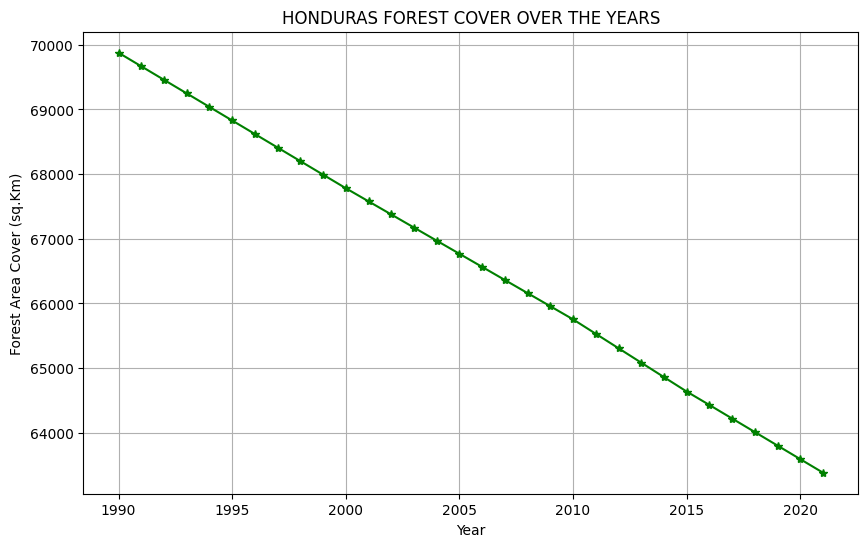

In [12]:
# Plotting the time series of forest cover in Honduras
plt.figure(figsize=(10, 6))
plt.plot(forest_sqkm_df['Year'], forest_sqkm_df['Value'], marker='*',color="green" ,linestyle='-')
plt.title('HONDURAS FOREST COVER OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Forest Area Cover (sq.Km)')
plt.grid(True)
plt.show()

- There has a been a decline in the forest cover over the years.

In [13]:
avg_precp_df.head()

,Country Name,Year,Indicator Name,Value
263,Honduras,2020,Average precipitation in depth (mm per year),1976.0
264,Honduras,2019,Average precipitation in depth (mm per year),1976.0
265,Honduras,2018,Average precipitation in depth (mm per year),1976.0
266,Honduras,2017,Average precipitation in depth (mm per year),1976.0
267,Honduras,2016,Average precipitation in depth (mm per year),1976.0


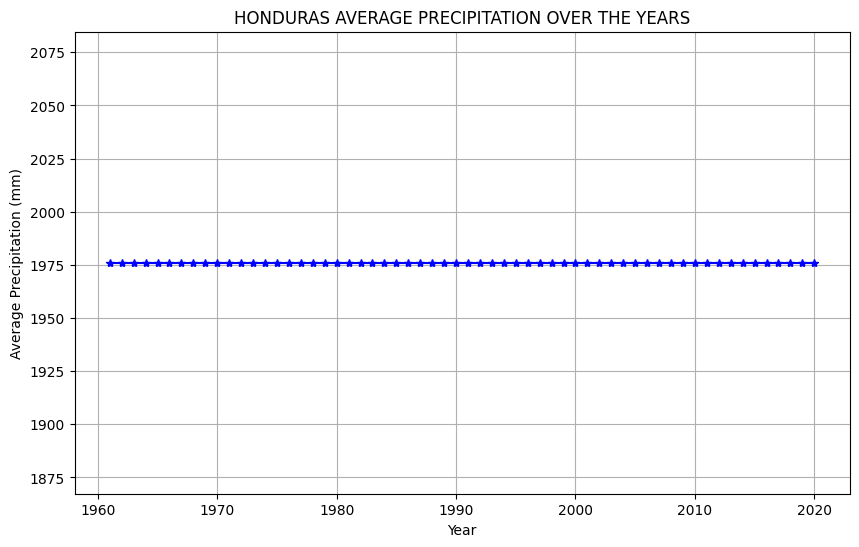

In [14]:
## Plotting time series of precipitation in Honduras
plt.figure(figsize=(10, 6))
plt.plot(avg_precp_df['Year'], avg_precp_df['Value'], marker='*',color="blue" ,linestyle='-')
plt.title('HONDURAS AVERAGE PRECIPITATION OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.grid(True)
plt.show()

In [15]:
avg_precp_df['Value'].describe()

count      60.0
mean     1976.0
std         0.0
min      1976.0
25%      1976.0
50%      1976.0
75%      1976.0
max      1976.0
Name: Value, dtype: float64

- There seems to be a problem with the variable. The average precipitation over the years seem to be constant.
- A better dataset to confirm this results.

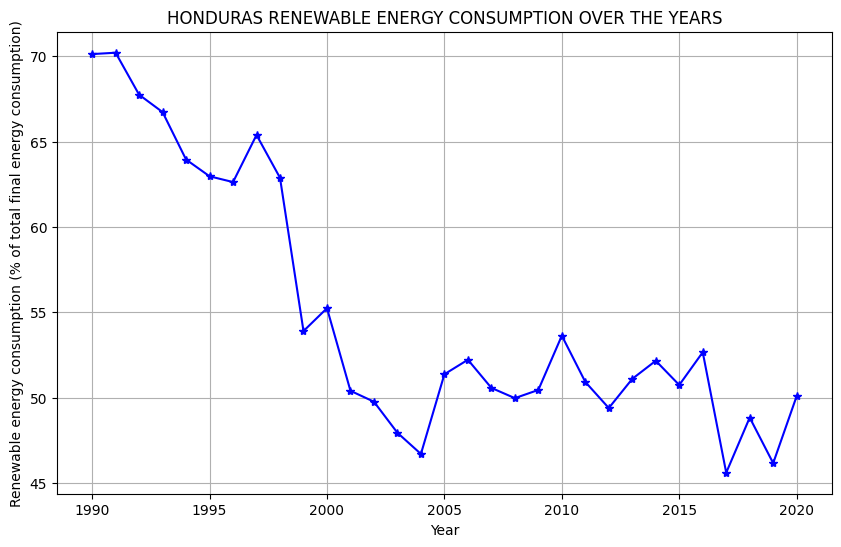

In [16]:
## Plotting time series of renewable energy in Honduras
plt.figure(figsize=(10, 6))
plt.plot(renewable_cons_df['Year'], renewable_cons_df['Value'], marker='*',color="blue" ,linestyle='-')
plt.title('HONDURAS RENEWABLE ENERGY CONSUMPTION OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Renewable energy consumption (% of total final energy consumption)')
plt.grid(True)
plt.show()


- The consumption of renewable energy in Honduras has decreased over the years.
- With the world transitioning to a low carbon economy, why is Honduras not embracing the use of renewable energy as much?

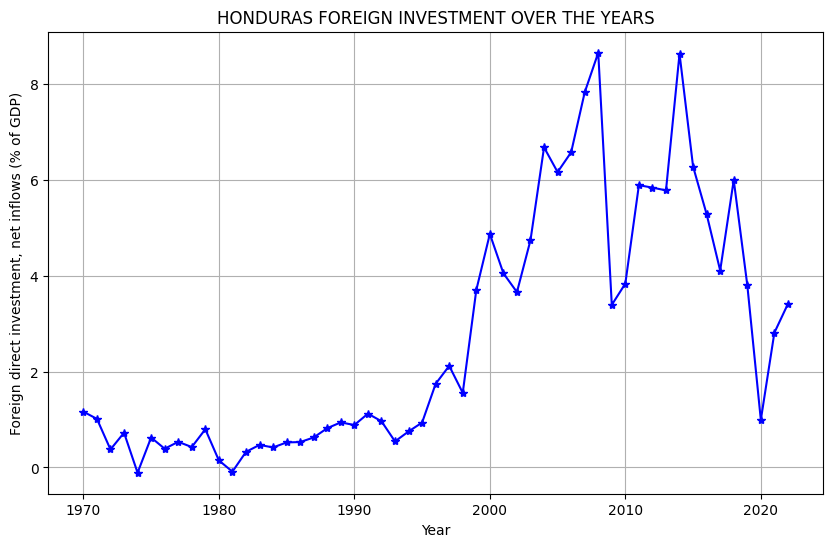

In [17]:
## Plotting time series of foreign investment in Honduras
plt.figure(figsize=(10, 6))
plt.plot(foreign_inves_df['Year'], foreign_inves_df['Value'], marker='*',color="blue" ,linestyle='-')
plt.title('HONDURAS FOREIGN INVESTMENT OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Foreign direct investment, net inflows (% of GDP)')
plt.grid(True)
plt.show()


- Increase in foreign investment from 1998 to 2000.
- My assumption here is that the foreign investment in this case is for the purpose of climate finance.

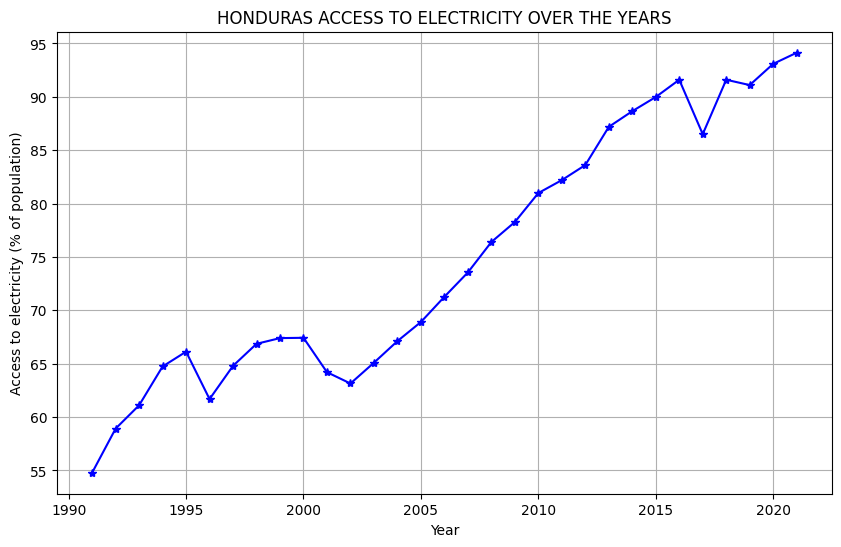

In [18]:
#'Access to electricity (% of population)'
## Plotting time series of foreign investment in Honduras
plt.figure(figsize=(10, 6))
plt.plot(elec_access_df['Year'], elec_access_df['Value'], marker='*',color="blue" ,linestyle='-')
plt.title('HONDURAS ACCESS TO ELECTRICITY OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Access to electricity (% of population)')
plt.grid(True)
plt.show()


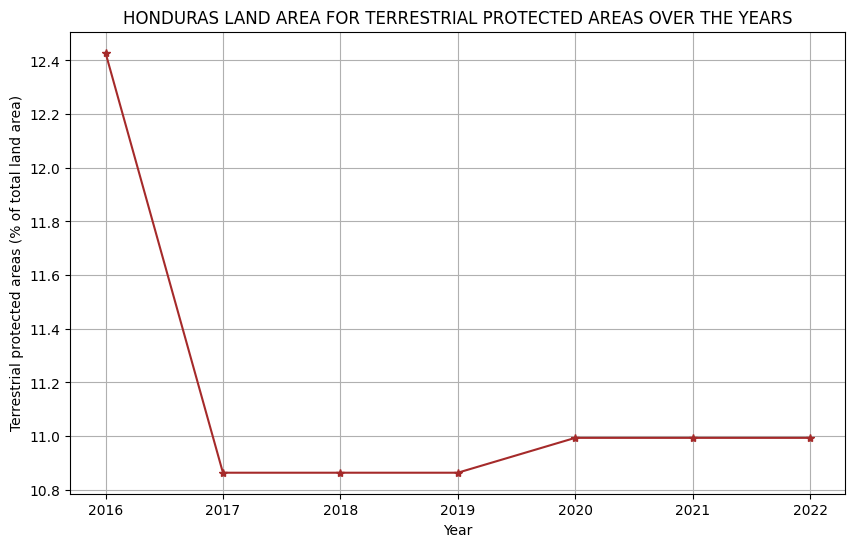

In [19]:
#'Terrestrial protected areas (% of total land area)'
## Plotting time series of terrestial protected areas in Honduras
plt.figure(figsize=(10, 6))
plt.plot(terrestial_marine_protected_areas['Year'], terrestial_marine_protected_areas['Value'], marker='*',color="brown" ,linestyle='-')
plt.title('HONDURAS LAND AREA FOR TERRESTRIAL PROTECTED AREAS OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Terrestrial protected areas (% of total land area)')
plt.grid(True)
plt.show()



- There has been a decline in the land area for terrestial protected areas over the years.

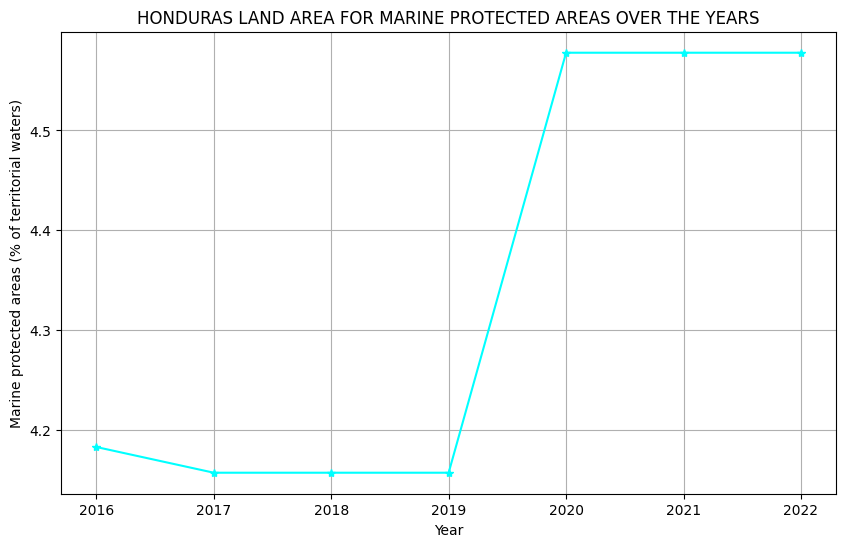

In [20]:
#'Marine protected areas (% of territorial waters)'
## Plotting time series of Marine protected areas in Honduras
plt.figure(figsize=(10, 6))
plt.plot(marine_protected_areas_percent['Year'], marine_protected_areas_percent['Value'], marker='*',color="cyan" ,linestyle='-')
plt.title('HONDURAS LAND AREA FOR MARINE PROTECTED AREAS OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Marine protected areas (% of territorial waters)')
plt.grid(True)
plt.show()



- There has been an increase in marine protected areas over the years in Honduras.
- Both Marine Protected Areas (MPAs) and Terrestrial Protected Areas (TPAs) play important roles in addressing and mitigating the impacts of climate change.
- They play a crucial role in carbon sequestration. These ecosystems capture and store significant amounts of carbon, helping mitigate the effects of rising atmospheric carbon dioxide levels.


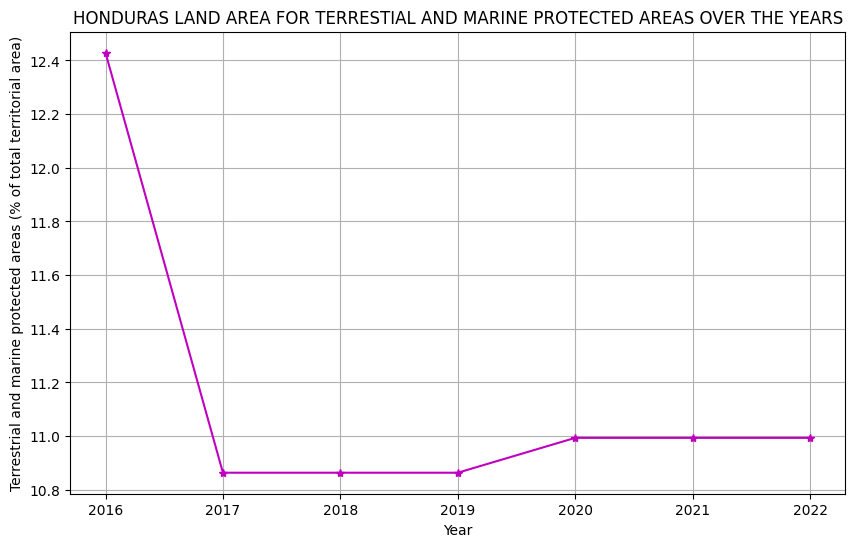

In [21]:
terrestial_marine_protected_areas
'Terrestrial and marine protected areas (% of total territorial area)'
## Plotting time series of Marine protected areas in Honduras
plt.figure(figsize=(10, 6))
plt.plot(terrestial_marine_protected_areas
['Year'], terrestial_marine_protected_areas
['Value'], marker='*',color="m" ,linestyle='-')
plt.title('HONDURAS LAND AREA FOR TERRESTIAL AND MARINE PROTECTED AREAS OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Terrestrial and marine protected areas (% of total territorial area)')
plt.grid(True)
plt.show()

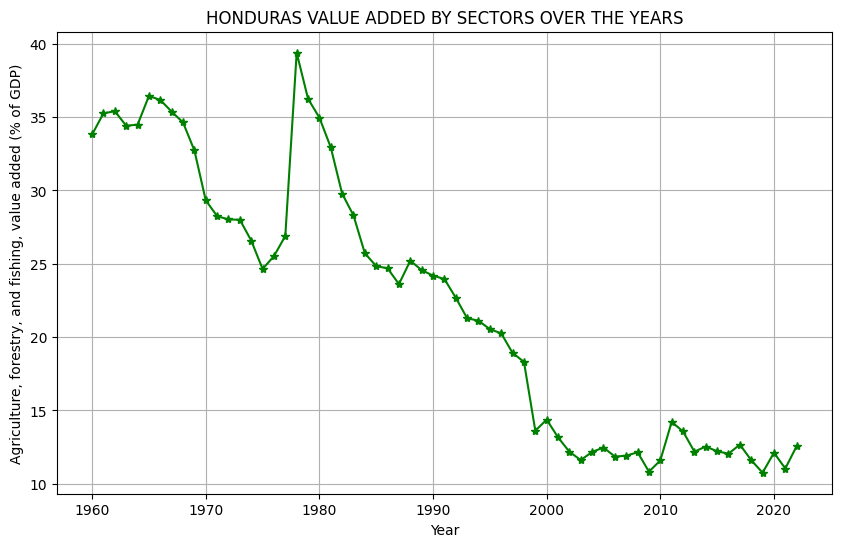

In [22]:
'Agriculture, forestry, and fishing, value added (% of GDP)'
## Plotting time series of Marine protected areas in Honduras
plt.figure(figsize=(10, 6))
plt.plot(agriculture_value_added
['Year'], agriculture_value_added
['Value'], marker='*',color="g" ,linestyle='-')
plt.title('HONDURAS VALUE ADDED BY SECTORS OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Agriculture, forestry, and fishing, value added (% of GDP)')
plt.grid(True)
plt.show()


- The value added by the combined agriculture,forestry and fishing sector in the economy of Honduras has been declining over the years.

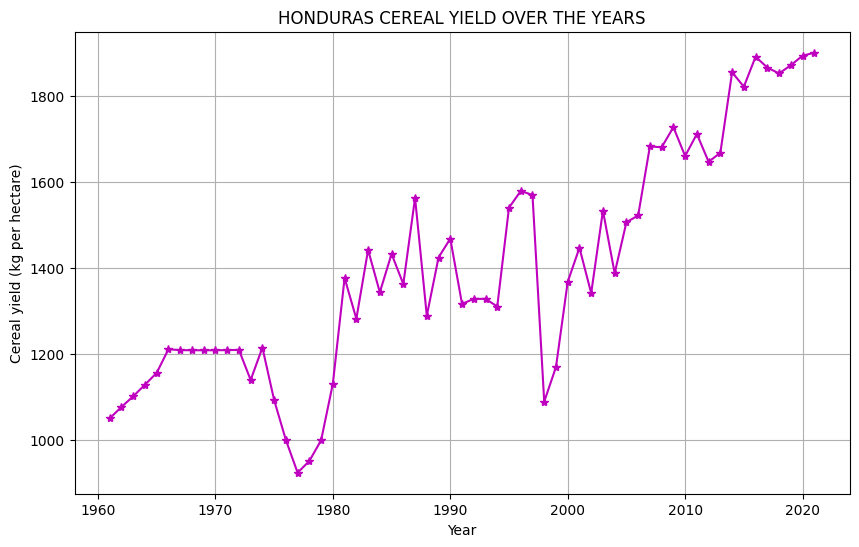

In [23]:
#'Cereal yield (kg per hectare)'
## Plotting time series of Marine protected areas in Honduras
plt.figure(figsize=(10, 6))
plt.plot(cereal_yield_df
['Year'], cereal_yield_df
['Value'], marker='*',color="m" ,linestyle='-')
plt.title('HONDURAS CEREAL YIELD OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Cereal yield (kg per hectare)')
plt.grid(True)
plt.show()


- The cereal yield in honduras has increased throughout the years.

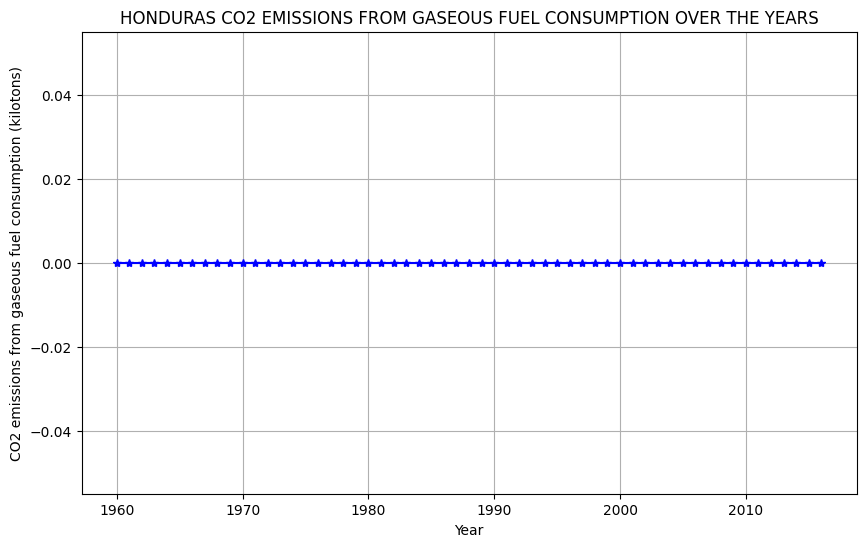

In [24]:
## Plotting time series of CO2 emissions from gaseous fuel consumption in Honduras
plt.figure(figsize=(10, 6))
plt.plot(co2_fuel_df['Year'], co2_fuel_df['Value'], marker='*',color="b" ,linestyle='-')
plt.title('HONDURAS CO2 EMISSIONS FROM GASEOUS FUEL CONSUMPTION OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('CO2 emissions from gaseous fuel consumption (kilotons)')
plt.grid(True)
plt.show()


- Zero CO2 emissions from gaseous fuel consumption. Implying zero to no people were using gaseous fuel.

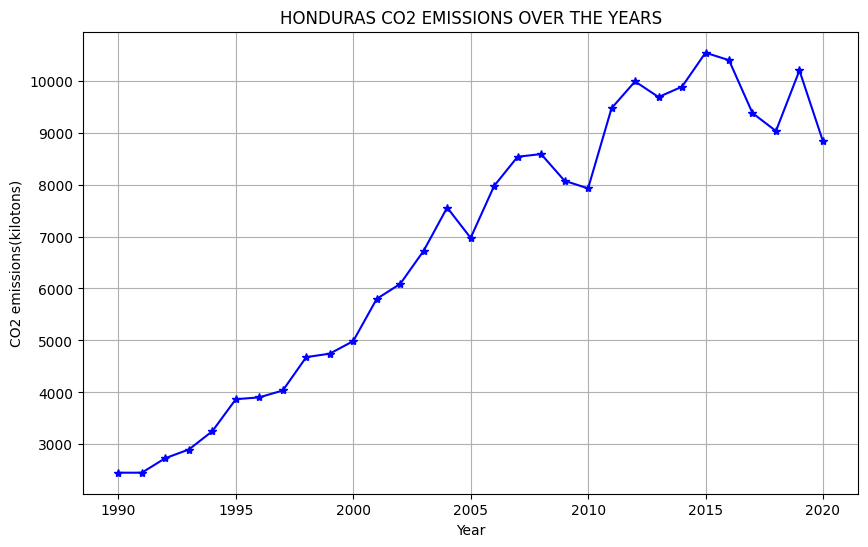

In [25]:
co2_kt
## Plotting time series of CO2 emissions in Honduras
plt.figure(figsize=(10, 6))
plt.plot(co2_kt['Year'], co2_kt['Value'], marker='*',color="b" ,linestyle='-')
plt.title('HONDURAS CO2 EMISSIONS OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('CO2 emissions(kilotons)')
plt.grid(True)
plt.show()


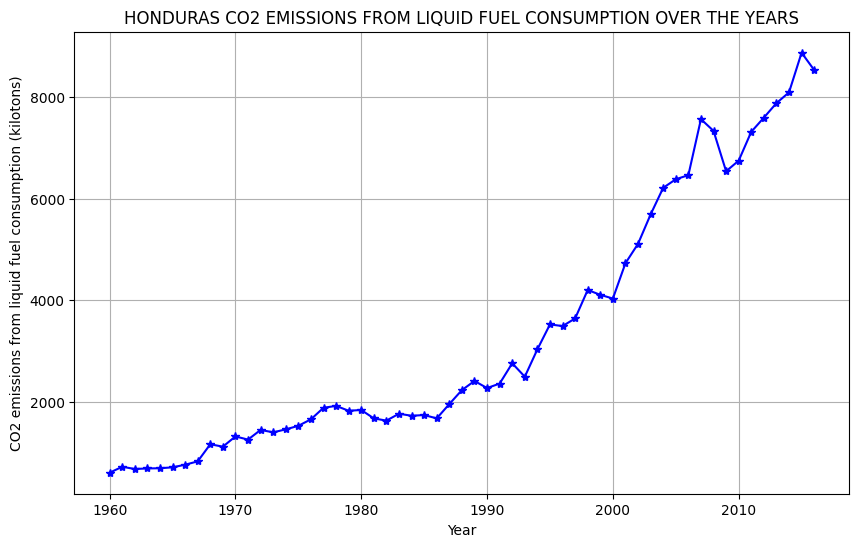

In [26]:
## Plotting time series of CO2 emissions from liquid fuel consumption in Honduras
plt.figure(figsize=(10, 6))
plt.plot(co2_liquid_fuel_kt['Year'], co2_liquid_fuel_kt['Value'], marker='*',color="b" ,linestyle='-')
plt.title('HONDURAS CO2 EMISSIONS FROM LIQUID FUEL CONSUMPTION OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel( 'CO2 emissions from liquid fuel consumption (kilotons)')
plt.grid(True)
plt.show()

- There was an increase in the CO2 emissions from liquid fuel consumption,implying there was an increasing in the number of people using liquid fuel.

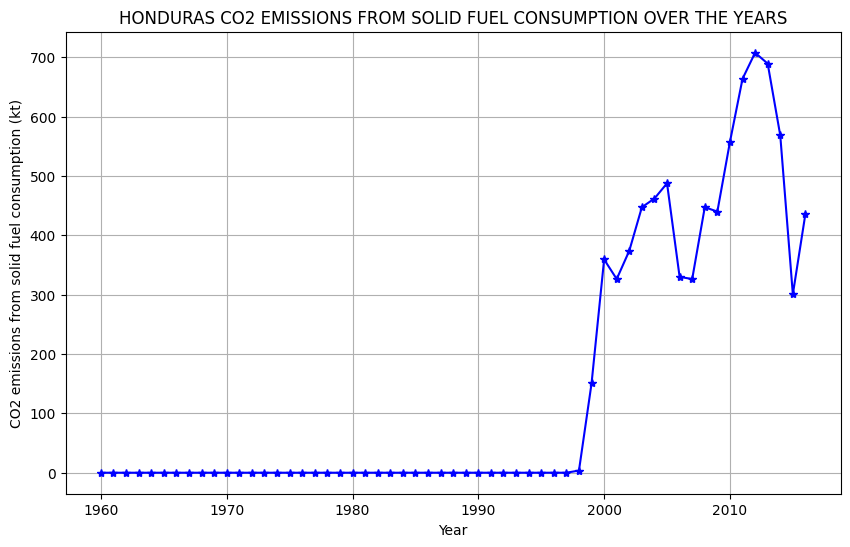

In [27]:
## Plotting time series of CO2 emissions from solid fuel consumption in Honduras
plt.figure(figsize=(10, 6))
plt.plot(co2_solid_fuel_kt['Year'], co2_solid_fuel_kt['Value'], marker='*',color="b" ,linestyle='-')
plt.title('HONDURAS CO2 EMISSIONS FROM SOLID FUEL CONSUMPTION OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel( 'CO2 emissions from solid fuel consumption (kt)')
plt.grid(True)
plt.show()


- There was zero consumption of solid fuel from 1961 to 1997.
- An increase in solid fuel consumption from 1997 to 2000. What could have been the possible cause of this sudden spike?



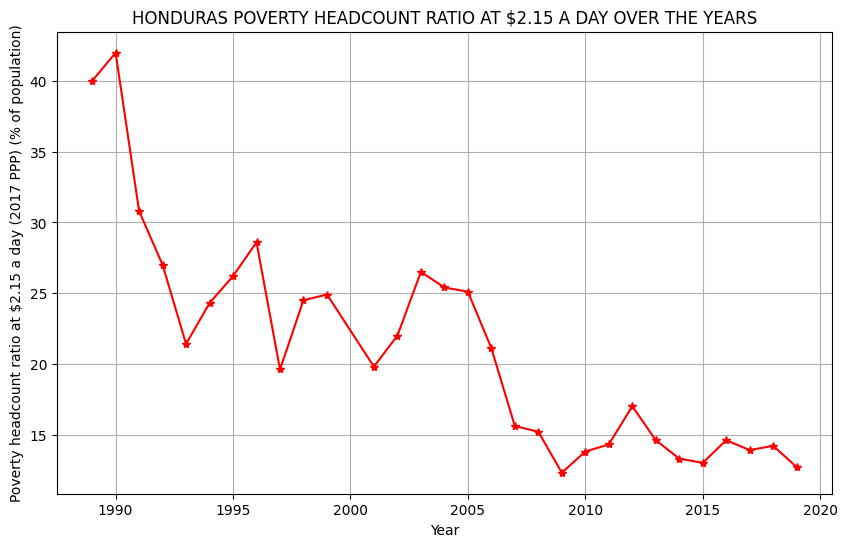

In [28]:
'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'
## Plotting time series of CO2 emissions from solid fuel consumption in Honduras
plt.figure(figsize=(10, 6))
plt.plot(poverty_headcount_percent['Year'], poverty_headcount_percent['Value'], marker='*',color="red" ,linestyle='-')
plt.title('HONDURAS POVERTY HEADCOUNT RATIO AT $2.15 A DAY OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)')
plt.grid(True)
plt.show()


- Is an economic indicator that measures the percentage of a population living below the specified poverty line of $2.15 per day, adjusted for purchasing power parity (PPP) using 2017 values.
- The graph suggests a reduction in the percentage of the population living below the specified poverty line(positive).

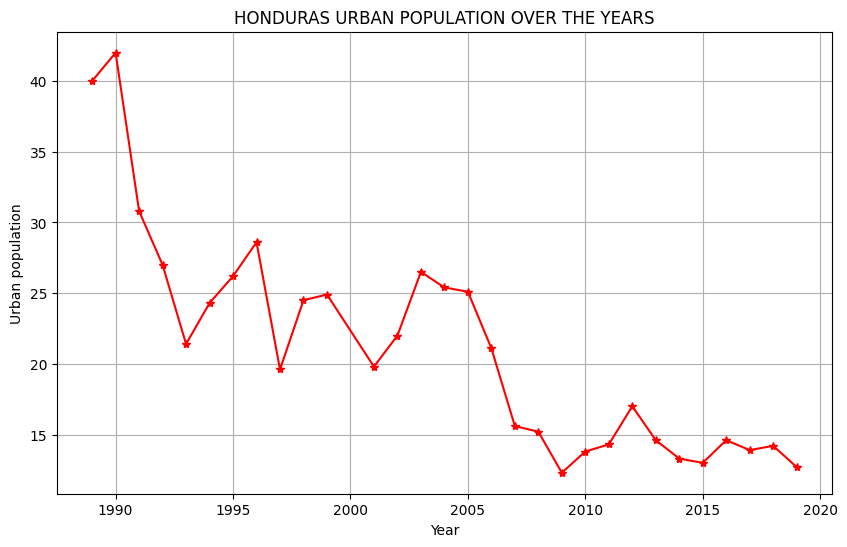

In [29]:
## Plotting time series of the urban population in Honduras
plt.figure(figsize=(10, 6))
plt.plot(poverty_headcount_percent['Year'], poverty_headcount_percent['Value'], marker='*',color="red" ,linestyle='-')
plt.title('HONDURAS URBAN POPULATION OVER THE YEARS')
plt.xlabel('Year')
plt.ylabel('Urban population')
plt.grid(True)
plt.show()


- There was a decline in the population leaving in urban areas.

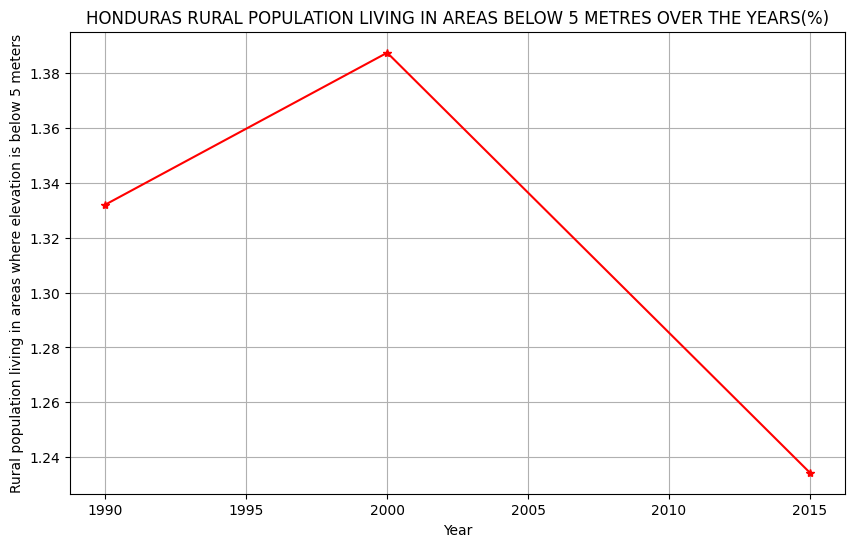

In [30]:
## Plotting time series of the urban population in Honduras
plt.figure(figsize=(10, 6))
plt.plot(rural_elev_below_5['Year'], rural_elev_below_5['Value'], marker='*',color="red" ,linestyle='-')
plt.title('HONDURAS RURAL POPULATION LIVING IN AREAS BELOW 5 METRES OVER THE YEARS(%)')
plt.xlabel('Year')
plt.ylabel('Rural population living in areas where elevation is below 5 meters')
plt.grid(True)
plt.show()

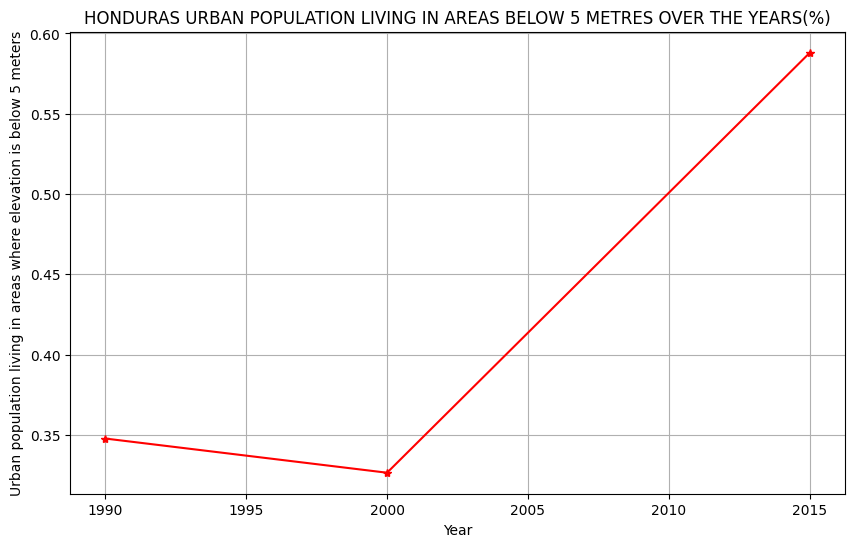

In [31]:
## Plotting time series of the urban population in Honduras
plt.figure(figsize=(10, 6))
plt.plot(urban_elev_below_5['Year'], urban_elev_below_5['Value'], marker='*',color="red" ,linestyle='-')
plt.title('HONDURAS URBAN POPULATION LIVING IN AREAS BELOW 5 METRES OVER THE YEARS(%)')
plt.xlabel('Year')
plt.ylabel('Urban population living in areas where elevation is below 5 meters')
plt.grid(True)
plt.show()

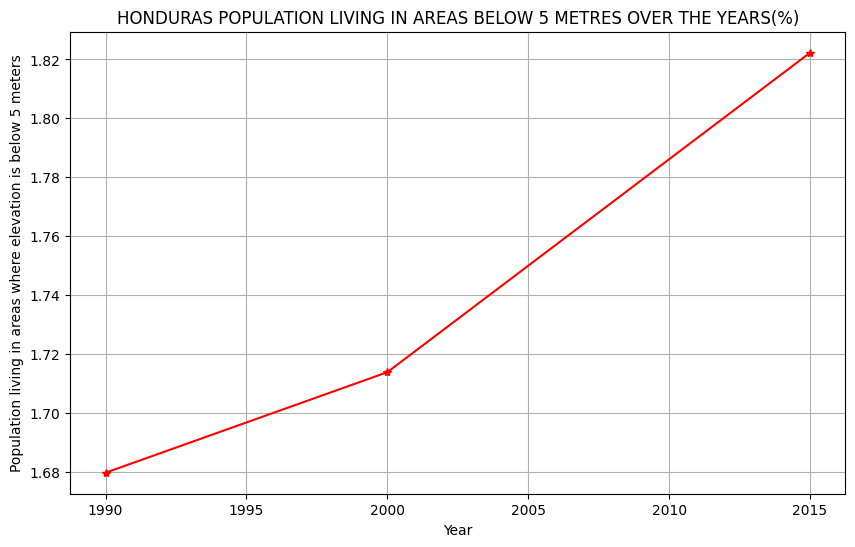

In [32]:
## Plotting time series of the urban population in Honduras
plt.figure(figsize=(10, 6))
plt.plot(popln_below_5['Year'], popln_below_5['Value'], marker='*',color="red" ,linestyle='-')
plt.title('HONDURAS POPULATION LIVING IN AREAS BELOW 5 METRES OVER THE YEARS(%)')
plt.xlabel('Year')
plt.ylabel('Population living in areas where elevation is below 5 meters')
plt.grid(True)
plt.show()

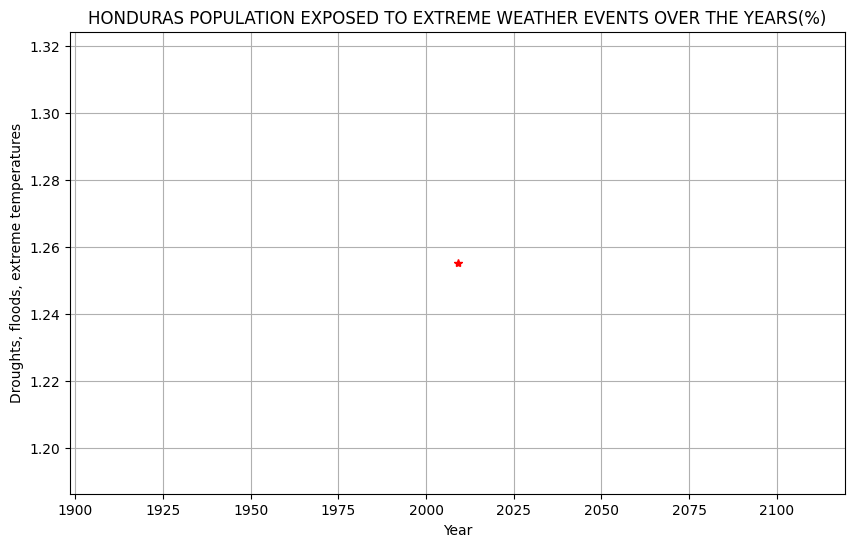

In [33]:
## Plotting time series of the urban population in Honduras
plt.figure(figsize=(10, 6))
plt.plot(floods_popln['Year'], floods_popln['Value'], marker='*',color="red" ,linestyle='-')
plt.title('HONDURAS POPULATION EXPOSED TO EXTREME WEATHER EVENTS OVER THE YEARS(%)')
plt.xlabel('Year')
plt.ylabel('Droughts, floods, extreme temperatures')
plt.grid(True)
plt.show()

In [34]:
floods_popln

,Country Name,Year,Indicator Name,Value
1285,Honduras,2009,"Droughts, floods, extreme temperatures (% of p...",1.255291


- Provides information on the percentage of a country's population that, on average from 1990 to 2009, experienced the impacts of droughts, floods, and extreme temperatures.

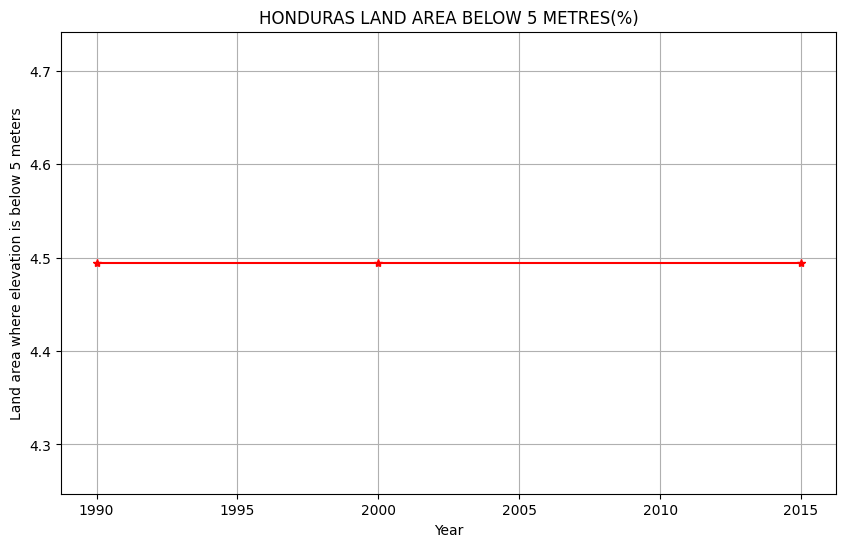

In [35]:
## Plotting time series of the urban population in Honduras
plt.figure(figsize=(10, 6))
plt.plot(land_area_df['Year'], land_area_df['Value'], marker='*',color="red" ,linestyle='-')
plt.title('HONDURAS LAND AREA BELOW 5 METRES(%)')
plt.xlabel('Year')
plt.ylabel('Land area where elevation is below 5 meters')
plt.grid(True)
plt.show()

#**USING SATELLITE IMAGERY DATA**

In [36]:
#installing the gee library
!pip install geemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00


In [37]:
#importing required libraries
import ee
import geemap

In [38]:
#authenticate and initialize earth engine
#ee.Authenticate()
#ee.Initialize()

### **NDVI MAP OF HONDURAS FOR 2022**

![Honduras_NDVI_map](https://github.com/Lorraine254/PrinciplesOfDSA/assets/100379159/ac6d6bcc-071c-4f3f-8ade-84cdaf6c3f18)

- Shades of green are associated with NDVI values closer to 1 which implies dense and healthy vegetation.
- Shades of yellow are associated with low NDVI values which implies non-vegetated or sparse vegetation.
-The code for generating the map is shown below. Currently commented out to ensure smooth running of the notebook.

In [39]:
## Placing the base map
#Map = geemap.Map()
#Map

## Loading countries data
#dataset =ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0")

## filtering the dataset based on our region of interest(Honduras)
#Honduras = dataset.filter(ee.Filter.eq('ADM0_NAME','Honduras'))

## Loading our MODIS data
#collection = ee.ImageCollection("MODIS/061/MOD13A1").filterDate('2021-01-01','2022-01-01').filterBounds(Honduras) # Filtering the NDVI to the year 2021 to 2022

## Extracting the NDVI Band collection from the collection of MODIS data
#modisNDVI = collection.select('NDVI')

## Average NDVI
#average_ndvi = modisNDVI.reduce(ee.Reducer.mean()).clip(Honduras);

## Creating a colour pallete for the map ->
#cols ={'palette':['ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901','66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01','012e01', '011d01', '011301'], 'min':0, 'max' : 8000 }

## Displaying the map
#Map.addLayer(average_ndvi.clip(Honduras),cols);
#Map.centerObject(Honduras,8)
#Map



-  (##) represents the comments and # represents the code.

## **SURFACE AIR TEMPERATURE MAP OF HONDURAS**

![Honduras_LST](https://github.com/Lorraine254/PrinciplesOfDSA/assets/100379159/be9f1d4f-3674-4a26-9203-1b709cbedb9d)


- Areas marked in red have a high surface temperature.
- Areas marked in orange have an average surface temperature.
- Areas marked in dark green have a low surface temperature.
-The code for generating the map is shown below. Currently commented out to ensure smooth running of the notebook.

In [53]:
## Placing the base map
#Map = geemap.Map()
#Map

## Loading countries data
#dataset =ee.FeatureCollection("FAO/GAUL_SIMPLIFIED_500m/2015/level0")

## filtering the dataset based on our region of interest(Honduras)
#Honduras = dataset.filter(ee.Filter.eq('ADM0_NAME','Honduras'))

##Import the Land Surface Temperature image collection
#collection = ee.ImageCollection("MODIS/061/MOD11A1").filterDate("2022-01-01","2022-12-31").select('LST_Day_1km') #Filtering the LST to our year of interest(2022)

# Kelvin to Celsius conversion
#modcel = collection.map(lambda img: img
                   #.multiply(0.02) #scale to be used by the LST_Day_1km band
                   #.subtract(273.15)
                   #.copyProperties(img, ['system:time_start']))

#mean = modcel.mean()

## Creating a colour pallete for the map
#cols ={'palette':["12a418","4bff37","faff2e","ffac2c","ff1d10" ], 'min':21.72252173913046, 'max' : 33.052631578947405 }

## Displaying the map
#Map.addLayer(mean.clip(Honduras),cols,'LST mean')
#Map.centerObject(Honduras,8)
#Map


-  (##) represents the comments and # represents the code.

## **Q5.Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights. Why?**



1.   Food and agriculture organisation(FAO)- FAO is deeply involved in monitoring global agriculture and assessing food security. NDVI maps provide critical information on vegetation health and can be used to monitor crop conditions, detect anomalies, and predict agricultural productivity. LST maps are also relevant as they contribute to understanding temperature patterns that can impact crop growth and yield. For FAO, these maps are valuable tools for assessing food production, identifying areas at risk of food shortages, and implementing strategies to enhance food security.
2.  United Nations Environment Programme (UNEP) - UNEP is committed to monitoring and preserving global ecosystems and biodiversity. NDVI maps are valuable for assessing vegetation health, identifying changes in land cover, and monitoring the condition of ecosystems.
3.   Climate scientist -  Climate scientists often conduct studies to better understand the Earth's climate system. They may use the dataset to validate climate models, analyze trends over time, and contribute to the scientific community's understanding of climate change. Insights derived from the dataset could lead to new research findings, scientific publications, and recommendations for addressing climate-related challenges.






##**Q4.What issues or challenges are you experiencing with your dataset if any?**

- Data for a few of the climatic indicators are missing for certain years. As a result, I was unable to recognize trends in some of the data.


# **PART 2**

##**Explain how two of the issues raised in this video may impact the dataset from your assigned country. (200 words maximum.)**


Mainak mentions the issue of undercounting which refers to not adequately representing a particular group. For my dataset, some indicator variables had missing years. As a result, this would possibly affect climate predictions of that particular indicator, hence resulting into not so accurate results.

Mainak also highlighed the impacts of bias data on AI. Training machine learning algorithms on biased data can result in AI systems that perpetuate and even exacerbate existing biases, leading to incorrect decisions and predictions. Biased data can reflect and reinforce societal prejudices, discrimination, or systemic inequalities. For my dataset, Artificial Intelligence models trained on biased climatic data, may hinder effective adaptation and mitigation techniques as a result of biased distribution of vulnerable areas.

